In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1) Load dataset
df = pd.read_csv("netflix_titles.csv.csv")   # your dataset
df = df[['type', 'description']].dropna()

# Convert labels (Movie / TV Show) → numbers
le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])

texts = df['description'].values
labels = df['label'].values

# 2) Tokenization + Padding
max_words = 5000        # only keep top 5000 words
max_len = 150           # cut or pad all descriptions to length 150


In [3]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

In [4]:
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [5]:
# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42
)

In [6]:
# 4) Build LSTM Model
model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\students\.conda\envs\tensorflow_env\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 5) Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6969 - loss: 0.6189 - val_accuracy: 0.6948 - val_loss: 0.6158
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6987 - loss: 0.6130 - val_accuracy: 0.6948 - val_loss: 0.6160
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6987 - loss: 0.6133 - val_accuracy: 0.6948 - val_loss: 0.6152
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6987 - loss: 0.6127 - val_accuracy: 0.6948 - val_loss: 0.6154
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6987 - loss: 0.6126 - val_accuracy: 0.6948 - val_loss: 0.6153


In [9]:
# 6) Evaluate Accuracy
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6890 - loss: 0.6199

Test Accuracy: 0.6890
Test Loss: 0.6199


In [10]:
# 7) Plot Loss & Accuracy Graphs
import matplotlib.pyplot as plt

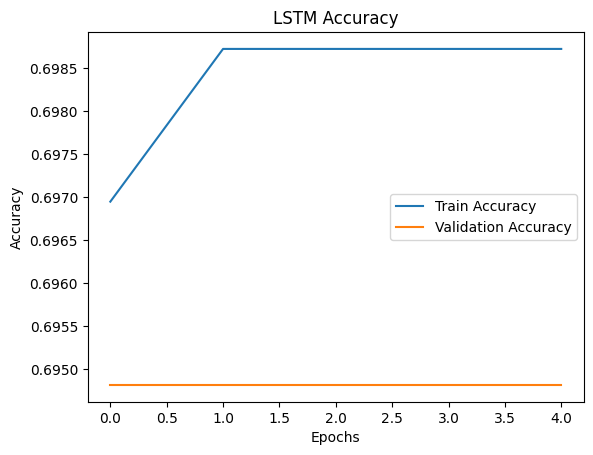

In [11]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Accuracy")
plt.legend()
plt.show()

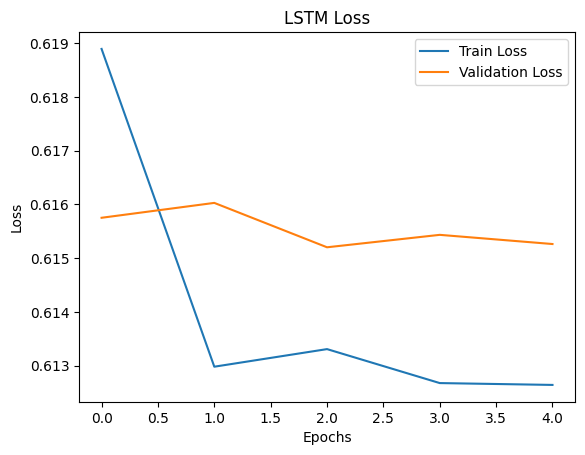

In [12]:
# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Loss")
plt.legend()
plt.show()